In [101]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df=pd.read_csv("UberDataset.csv")

In [105]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# DATA PREPROCESSING

In [109]:
df['PURPOSE'].fillna('NOT ASSIGNED',inplace=True)
df.head()

C:\Users\sameer\AppData\Local\Temp\ipykernel_5016\2311998358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('NOT ASSIGNED',inplace=True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT ASSIGNED
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [111]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [33]:
from datetime import datetime

In [113]:
df['date']=pd.DatetimeIndex(df['START_DATE']).date
df['time']=pd.DatetimeIndex(df['START_DATE']).hour

In [115]:
df['period']=pd.cut(x=df['time'],bins=[0,10,15,19,24],labels=['morning','afternoon','evening','night'])
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,period
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT ASSIGNED,2016-01-02,1.0,morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon


In [117]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   period      413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


# DATA VISUALIZATION

# 1)In which category do people book the most Uber rides? 
 

<Axes: xlabel='count', ylabel='CATEGORY'>

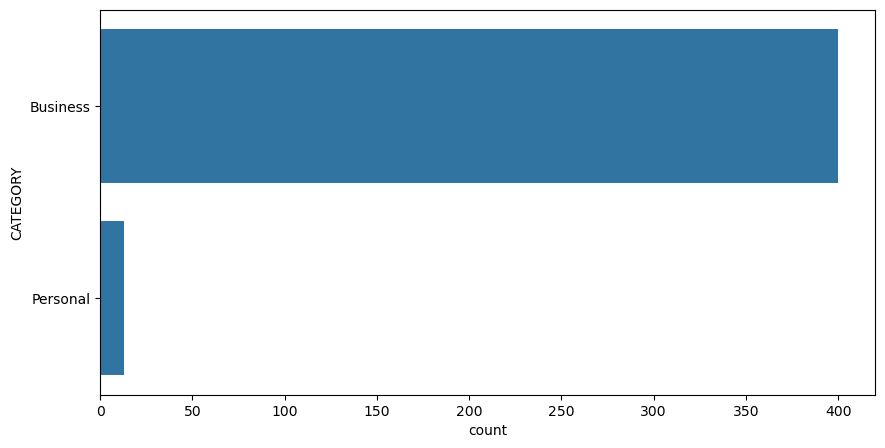

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(df['CATEGORY'])

C:\Users\sameer\AppData\Local\Temp\ipykernel_5016\1646563990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


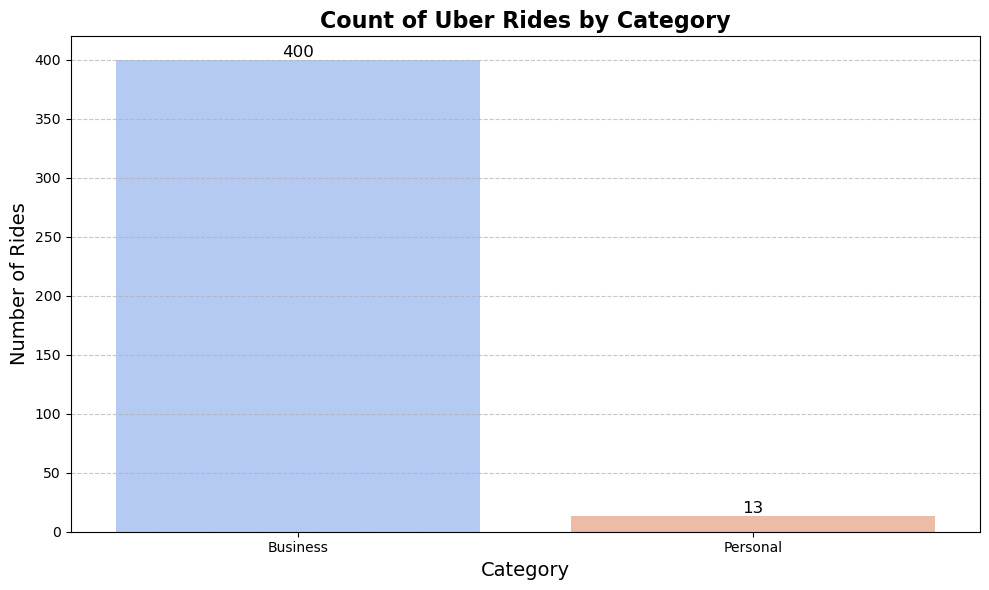

In [60]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='CATEGORY',
    data=df,
    palette='coolwarm',
    order=df['CATEGORY'].value_counts().index
)

# Add value annotations to bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Enhanced formatting
plt.title('Count of Uber Rides by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2)For which purpose do people book Uber rides the most?


<Axes: xlabel='count', ylabel='PURPOSE'>

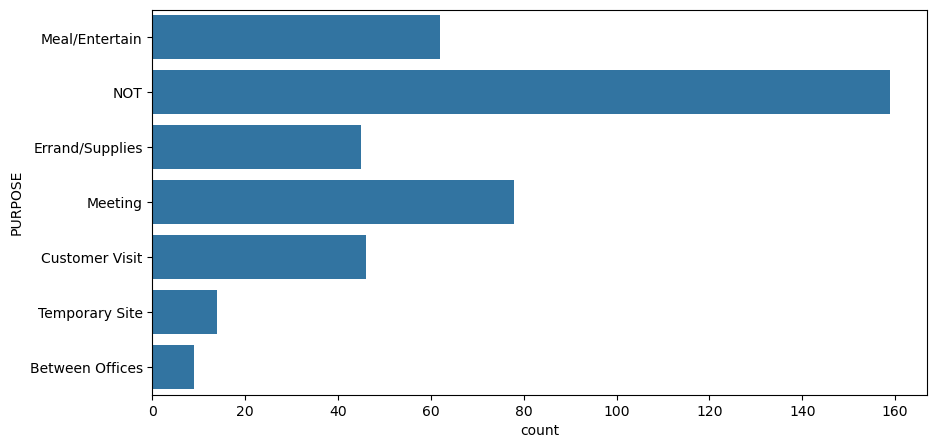

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(df['PURPOSE'])

C:\Users\sameer\AppData\Local\Temp\ipykernel_5016\266418971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


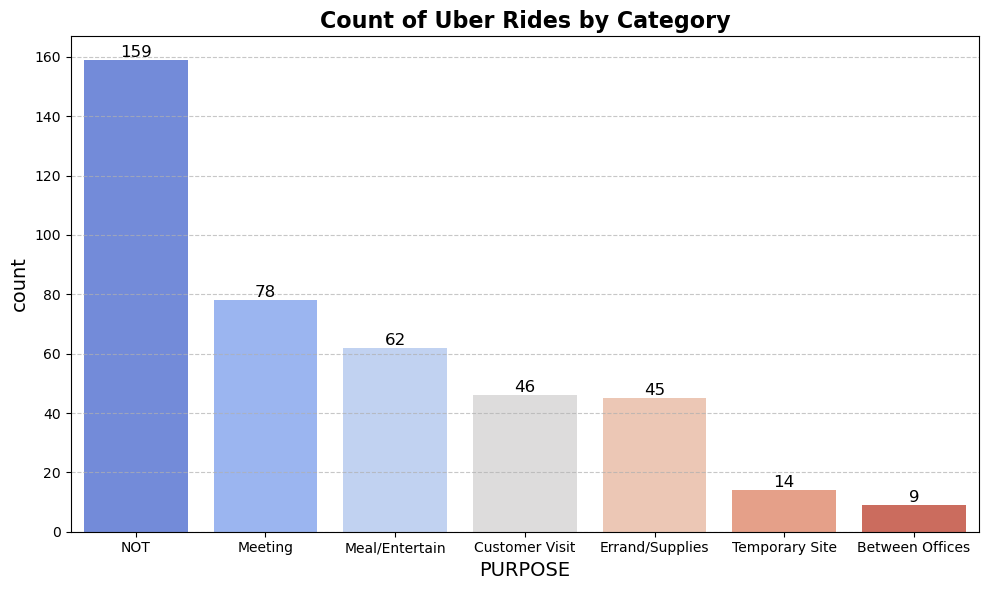

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='PURPOSE',
    data=df,
    palette='coolwarm',
    order=df['PURPOSE'].value_counts().index
)

# Add value annotations to bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Enhanced formatting
plt.title('Count of Uber Rides by Category', fontsize=16, fontweight='bold')
plt.xlabel('PURPOSE', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3)At what time do people book cabs the most from Uber?


<Axes: xlabel='count', ylabel='period'>

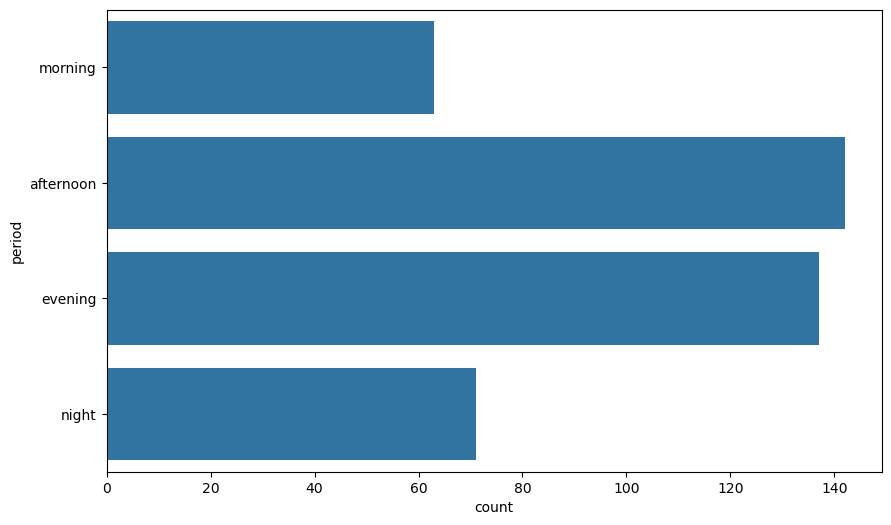

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(df['period'])

C:\Users\sameer\AppData\Local\Temp\ipykernel_5016\1280622150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


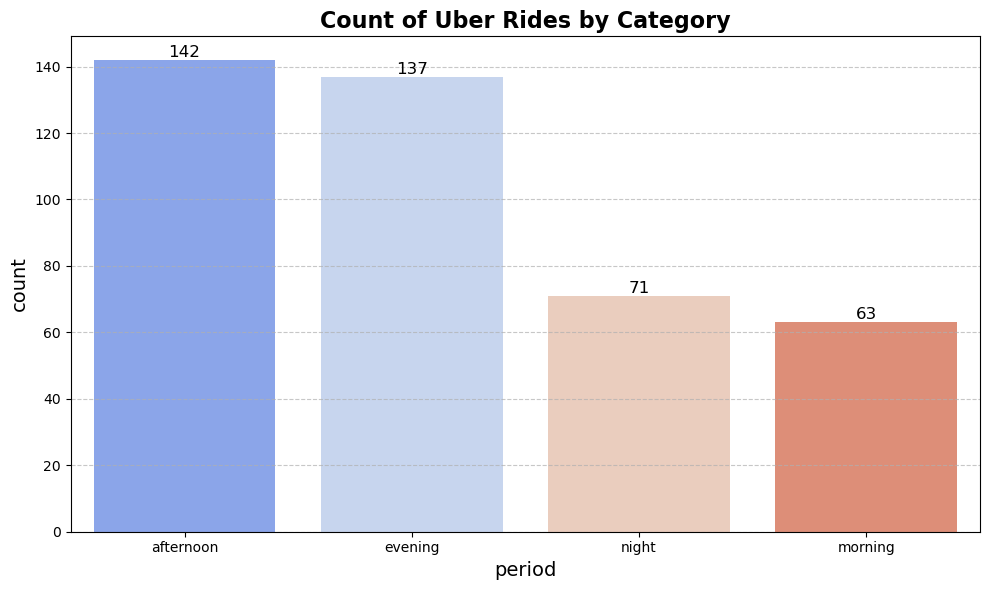

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='period',
    data=df,
    palette='coolwarm',
    order=df['period'].value_counts().index
)

# Add value annotations to bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, color='black'
    )

# Enhanced formatting
plt.title('Count of Uber Rides by Category', fontsize=16, fontweight='bold')
plt.xlabel('period', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4)In which months do people book Uber rides less frequently?

In [73]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,period
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon


In [83]:
df['date']=pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.month_name()

In [85]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,period,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,morning,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon,January


C:\Users\sameer\AppData\Local\Temp\ipykernel_5016\2630872741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')


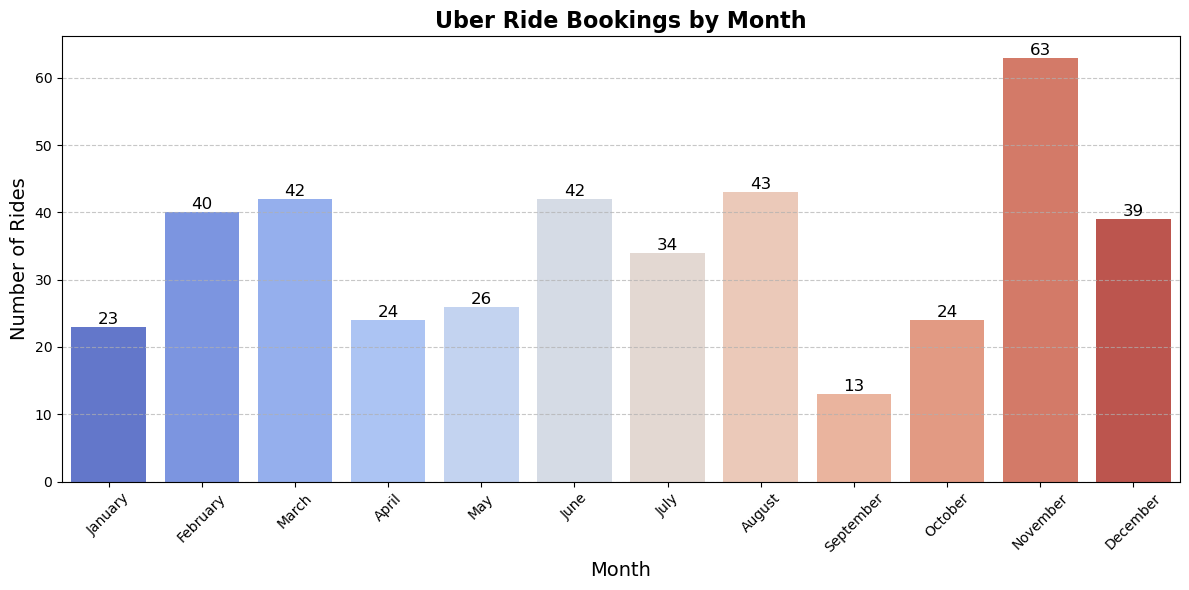

In [89]:
# Count the number of rides in each month
month_counts = df['Month'].value_counts()

# Calendar order for months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
month_counts = month_counts.reindex(month_order)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')

# Add value annotations to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Uber Ride Bookings by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5) On which days of the week do people book Uber rides the most?


In [92]:
df['day_of_week']=df['date'].dt.day_name()

C:\Users\sameer\AppData\Local\Temp\ipykernel_5016\3425156748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')


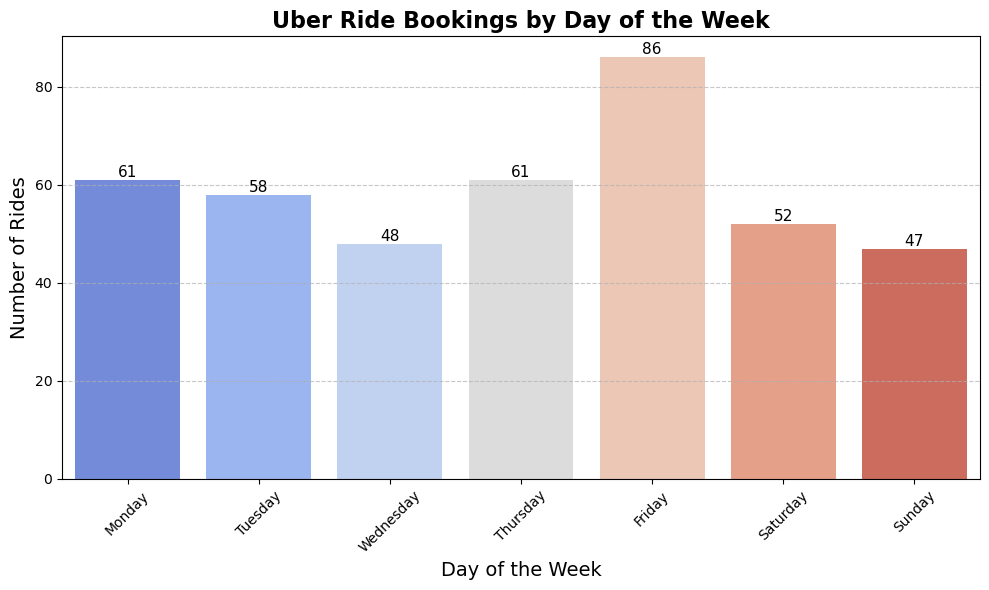

In [96]:
# Count rides per day of the week
day_counts = df['day_of_week'].value_counts()

# Sort days according to the order of the week (Monday first, Sunday last)
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(week_order)
# Plot the counts as a bar chart for better visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')

# Add value annotations on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black')

plt.title('Uber Ride Bookings by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6)How many miles do people usually book a cab for through Uber?

In [99]:
# Calculate summary statistics
average_distance = df['MILES'].mean()
median_distance = df['MILES'].median()
mode_distance = df['MILES'].mode().iloc[0]

print(f"Average ride distance: {average_distance:.2f} miles")
print(f"Median ride distance: {median_distance:.2f} miles")
print(f"Most frequent ride distance: {mode_distance:.2f} miles")

Average ride distance: 9.12 miles
Median ride distance: 5.70 miles
Most frequent ride distance: 9.90 miles
